In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Likelihood in Bayesian Models



In Bayesian statistics, the likelihood function is a crucial tool that shows how well different values of a model’s parameters explain the observed data. It’s a function of the parameters of a chosen probability distribution, not the data itself, and is denoted as $( P(\text{data} \mid \theta) )$, where $( \theta )$ represents the parameters. The likelihood connects the data we observe to the parameters we want to estimate and plays a central role in Bayes’ theorem:
$$ P(\theta \mid \text{data}) = \frac{P(\text{data} \mid \theta) \cdot P(\theta)}{P(\text{data})}$$

 - Likelihood: $ P(\text{data} \mid \theta) $: How probable the data is for different parameter values.
 - Prior $ P(\theta) $: Our initial beliefs about the parameters before seeing the data.
 - Posterior $ P(\theta \mid \text{data})$ : Our updated beliefs after combining the likelihood and prior.
 - Evidence $ P(\text{data}) $: A normalizing constant to ensure the posterior is a valid probability distribution.

When we model a process, we aim to describe a target variable, often called ( y ), which represents the outcome we care about (e.g., whether a student answers a question correctly or how many mistakes they make in an hour). We choose a probability distribution to model $y$, such as Bernoulli for binary outcomes (0 or 1) or Poisson for counts, based on our understanding of the process and domain expertise. The likelihood then evaluates how plausible the observed data is across all possible values of the distribution’s parameters.

## Example: Modeling Correctness or an "Aha!" Moment (Bernoulli Likelihood)
Suppose we’re studying whether students experience an "Aha!" moment (a sudden understanding) during a problem-solving task, or whether they make a mistake. This is a binary process: the outcome is either success (1, correct/Aha!) or failure (0, incorrect/no Aha!). The Bernoulli distribution is ideal here because it models binary outcomes with a parameter ( p ), the probability of success.
We don’t know the true value of ( p ), but the likelihood function helps us assess how likely our observed data is under all possible values of ( p ). For a single observation:

 - If a student answers correctly $y = 1$, the likelihood is $L(p \mid y=1) = p$.
 - If they answer incorrectly $y = 0$, the likelihood is $L(p \mid y=0) = 1 - p$.

For multiple observations, say 10 students with 7 correct answers and 3 incorrect ones, the likelihood is the product of individual likelihoods:
$$ L(p \mid \mathbf{y}) = p^7 (1 - p)^3 $$
This function depends on  $p$, the parameter, and shows how plausible different $p$ values are given the data. For example, $p = 0.7$ yields a higher likelihood because it aligns with observing 7 successes out of 10 trials.



## Example: Modeling Mistake Counts (Poisson Likelihood)
Now, imagine we’re modeling the number of mistakes a student makes while solving problems in an hour, which is count data (e.g., 0, 1, 2, ... errors). The Poisson distribution is appropriate here, with parameter $\lambda$, the average rate of mistakes per hour. 
For a single observation of 3 mistakes $k = 3$, the likelihood function is:
$$ L(\lambda \mid k=3) = \frac{\lambda^3 e^{-\lambda}}{3!} $$
This is a function of $\lambda$, showing how likely it is to observe 3 mistakes for different possible rates. For multiple observations, say 3 students with 2, 3, and 4 mistakes, the likelihood is:
$$ L(\lambda \mid \mathbf{k}) \propto \lambda^{2+3+4} e^{-3\lambda} = \lambda^9 e^{-3\lambda} $$
The likelihood peaks near $\lambda = 3 $ (since $9/3 = 3$), reflecting the average rate of mistakes.

**Key Point**: Likelihood is a Function of Parameters
The likelihood is not a probability distribution over the data; it’s a function of the parameters $p$  for Bernoulli, $\lambda$ for Poisson) for fixed data. It doesn’t sum or integrate to 1. Instead, it measures how well different parameter values explain the observed data. In Bayesian modeling, we choose the distribution (Bernoulli, Poisson, etc.) based on the nature of $y$, and the likelihood quantifies the plausibility of the data across the range of parameter values.

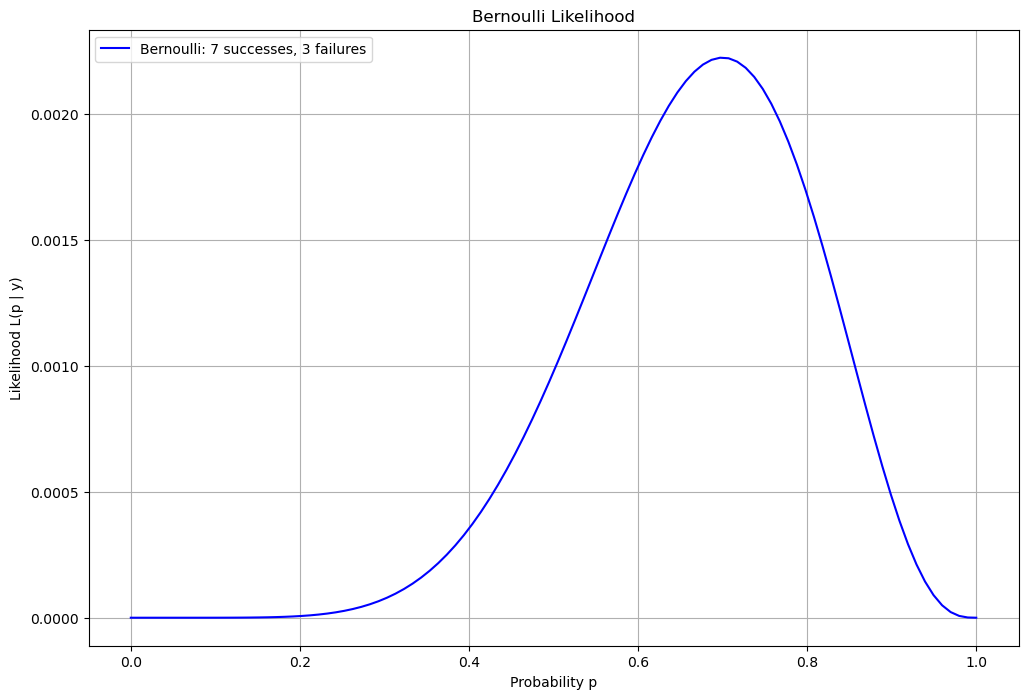

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Bernoulli Likelihood: 7 successes, 3 failures
p = np.linspace(0, 1, 100)
likelihood_bernoulli = p**7 * (1 - p)**3

# Poisson Likelihood: Single observation k=3
lambda_vals = np.linspace(0.01, 10, 200)
likelihood_poisson_single = (lambda_vals**3 * np.exp(-lambda_vals)) / factorial(3)

# Poisson Likelihood: Multiple observations k=[2,3,4]
k_multiple = [2, 3, 4]
sum_k = sum(k_multiple)
n = len(k_multiple)
likelihood_poisson_multiple = (lambda_vals**sum_k * np.exp(-n * lambda_vals)) / np.prod([factorial(k) for k in k_multiple])

# Plot
plt.figure(figsize=(12, 8))

# Bernoulli subplot
plt.plot(p, likelihood_bernoulli, label='Bernoulli: 7 successes, 3 failures', color='blue')
plt.xlabel('Probability p')
plt.ylabel('Likelihood L(p | y)')
plt.title('Bernoulli Likelihood')
plt.legend()
plt.grid(True)

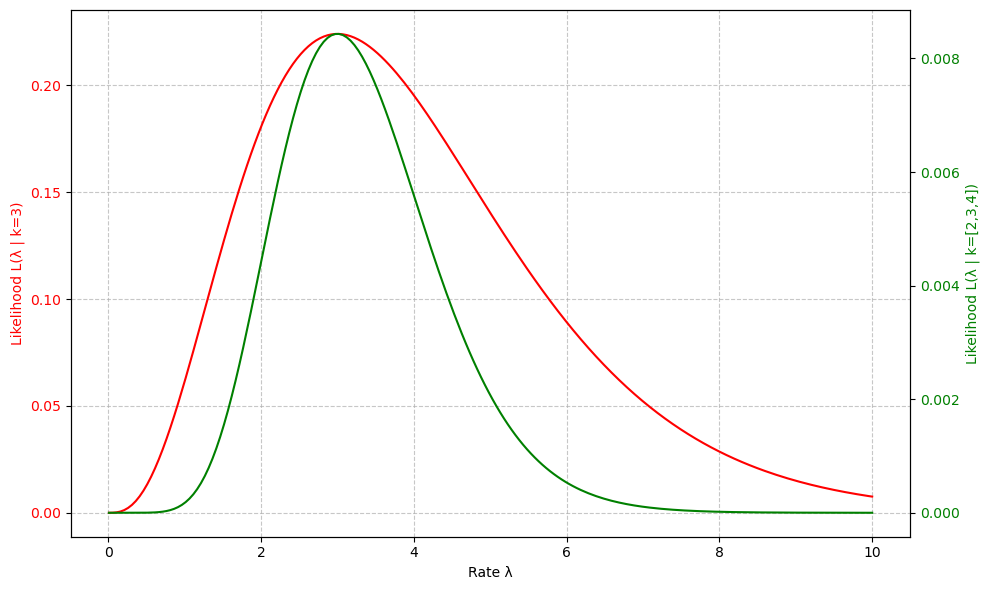

In [5]:
# Define lambda values (avoid zero to prevent numerical issues)
lambda_vals = np.linspace(0.01, 10, 200)

# Single observation: k = 3
k_single = 3
likelihood_single = (lambda_vals**k_single * np.exp(-lambda_vals)) / factorial(k_single)

# Multiple observations: k = [2, 3, 4]
k_multiple = [2, 3, 4]
sum_k = sum(k_multiple)
n = len(k_multiple)
likelihood_multiple = (lambda_vals**sum_k * np.exp(-n * lambda_vals)) / np.prod([factorial(k) for k in k_multiple])

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot single observation likelihood (left y-axis)
ax1.plot(lambda_vals, likelihood_single, label=f'Likelihood for k=3 (single)', color='red')
ax1.set_xlabel('Rate λ')
ax1.set_ylabel('Likelihood L(λ | k=3)', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(True, linestyle='--', alpha=0.7)

# Create second y-axis for multiple observations
ax2 = ax1.twinx()
ax2.plot(lambda_vals, likelihood_multiple, label=f'Likelihood for k=[2,3,4] (multiple)', color='green')
ax2.set_ylabel('Likelihood L(λ | k=[2,3,4])', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()